## Levlat plots with abs, diff for PI and PD separately

### div imports

In [1]:
import matplotlib.colors as colors
# load and autoreload
from IPython import get_ipython
from useful_scit.imps import (plt)

from sect_sens.constants import get_plotpath
from sect_sens.data_info.simulation_types import get_diff_by_type
from sect_sens.util.imports import get_averaged_fields
from sect_sens.util.plot.plot_levlat import plot_levlat_abs, get_cbar_label
from sect_sens.util.plot.plot_levlat import plot_levlat_diff
from sect_sens.util.practical_functions import make_folders
from sect_sens.util.plot.levlat_PIPD import abs_diffs_PI_PD_sep
from sect_sens.data_info.simulation_types import get_abs_by_type
from IPython.display import clear_output

from sect_sens.data_info.simulation_types import get_casen_by_type_mod

from sect_sens.util.slice_average.significance import load_and_plot_sign

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Div settings:

In [2]:
model = 'NorESM'

startyear = '0004-01'
endyear = '0008-12'
p_level = 1013.
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
p_levels = [1013., 900., 800., 700., 600.]  # used if not avg

In [3]:
cases_sec = [
    'NF1850_SECT_ctrl',
    'NF1850_aeroxid2014_SECT_ctrl'
]
cases_orig = [
    'NF1850_noSECT_def',
    'NF1850_aeroxid2014_noSECT_def',
    'NF1850_aeroxid2014_noSECT_ox_ricc',
    'NF1850_noSECT_ox_ricc'
]

cases = cases_orig + cases_sec

In [4]:
norm_dic = dict(
    SOA_LV=colors.SymLogNorm(vmin=-1e-1, vmax=1e-1, linthresh=.01, base=10),
    H2SO4=colors.SymLogNorm(vmin=-1e-1, vmax=1e-1, linthresh=.01, base=10),
    NCONC01=colors.SymLogNorm(vmin=-1e3, vmax=1e3, linthresh=10, base=10),
    N_AER=colors.SymLogNorm(vmin=-1e3, vmax=1e3, linthresh=10, base=10),
    N=colors.SymLogNorm(vmin=-2e2, vmax=2e2, linthresh=1, base=10),
    NMR01=colors.SymLogNorm(vmin=-10, vmax=10, linthresh=1, base=10),  # linscale=.5),
    AWNC_incld=colors.SymLogNorm(vmin=-50, vmax=50, linthresh=1, base=10),
    AREL_incld=colors.SymLogNorm(vmin=-5, vmax=5, linthresh=.1, base=10)
)

## Plot function:

In [5]:
def abs_diffs(di_dic, ctrl, cases_oth, varl):
    fig, axs = plt.subplots(4, len(varl),
                            gridspec_kw={'height_ratios': [4, 3, 3, .3]},
                            figsize=[subfig_size * len(varl), subfig_size * 3 * asp_ratio])
    axs_diff = axs[1:-1, :]
    axs_diff_cb = axs[-1, :]
    # ctrl = 'OsloAeroSec'
    # cases_oth = ['OsloAero$_{imp}$','OsloAero$_{def}$']
    for i, var in enumerate(varl):
        print(i, var)
        saxs = axs_diff[:, i]
        ax = saxs[0]
        for case_oth, ax in zip(cases_oth, saxs.flatten()):
            _, im = plot_levlat_diff(var, ctrl, case_oth,
                                     di_dic,
                                     cbar_orientation='horizontal',
                                     # title=None,
                                     ax=ax,
                                     # ylim=None,
                                     # figsize=None,
                                     cmap='RdBu_r',
                                     # use_ds_units=True,
                                     # add_colorbar=True,
                                     norm=norm_dic[var],
                                     add_colorbar=False
                                     )

        # ax.set_title(f'{key}: PIaerPD-PI')
        lab = f'$\Delta${get_cbar_label(di_dic[ctrl][var], var, diff=True)}'
        plt.colorbar(im, cax=axs_diff_cb[i], label=lab, orientation='horizontal')

    for i, var in enumerate(varl):
        print(i, var)
        ax = axs[0, i]
        _, im = plot_levlat_abs(var, ctrl,
                                di_dic,
                                cbar_orientation='horizontal',
                                # title=None,
                                ax=ax,
                                # ylim=None,
                                # figsize=None,
                                cmap='PuOr_r',
                                # use_ds_units=True,
                                # add_colorbar=True,
                                norm=norm_dic[var],
                                add_colorbar=False
                                )

        # ax.set_title(f'{key}: PIaerPD-PI')
        lab = get_cbar_label(di_dic[ctrl][var], var, diff=True)
        plt.colorbar(im, ax=ax, label=lab, orientation='horizontal')

    for i in range(len(axs_diff[:, 0])):
        for j in range(len(axs_diff[0, :])):
            ax = axs_diff[i, j]
            if i < (len(axs_diff[:, 0]) - 1):
                ax.set_xlabel('')
                plt.setp(ax.get_xticklabels(), visible=False)
            if i == (len(axs_diff[:, 0]) - 1):
                ax.set_xlabel('Latitude [$^\circ$N]')
            if j > 0:
                plt.setp(ax.get_yticklabels(), visible=False)
                ax.set_ylabel('')
    for ax in axs[0, :]:
        ax.set_xlabel('')
        plt.setp(ax.get_xticklabels(), visible=False)
    for ax in axs[0, 1:]:
        ax.set_ylabel('')
        plt.setp(ax.get_yticklabels(), visible=False)

    fig.tight_layout()
    return axs, fig

## Savepaths:

In [6]:
version = 'diffs'
plot_path = get_plotpath('levlat')
filen_base = plot_path + '/_%s' % version
# print(plot_path)
make_folders(plot_path)

## Variables to load: 

In [7]:
varl = ['NCONC01', 'AWNC_incld', 'AREL_incld', 'HYGRO01', 'CLDLIQ', 'N100', 'N250', 'FREQL', 'N50', 'N150', 'N200',
        'N_AER']
subfig_size = 2.9
asp_ratio = .9
print(varl)

['NCONC01', 'AWNC_incld', 'AREL_incld', 'HYGRO01', 'CLDLIQ', 'N100', 'N250', 'FREQL', 'N50', 'N150', 'N200', 'N_AER']


## Load data:

In [8]:
case_dic = get_averaged_fields.get_levlat_cases(cases, varl, startyear, endyear,
                                                pressure_adjust=pressure_adjust)

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/NCONC01_0004-01-0008-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/AWNC_incld_0004-01-0008-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/AREL_incld_0004-01-0008-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/HYGRO01_0004-01-0008-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/CLDLIQ_0004-01-0008-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/N100_0004-01-0008-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/N250_0004-01-0008-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/FREQL_0004-01-0008-12.nc
Loading file /ho

## Get PI to PD difference

In [9]:
relative = False
dic_diff = get_diff_by_type(case_dic, varl, ctrl='PI', case_types=['PI', 'PIaerPD'],
                            # mod_types=['OsloAeroSec','OsloAero$_{def}$'],
                            relative=relative)

['PI', 'PIaerPD'] ['OsloAeroSec', 'OsloAero$_{imp}$', 'OsloAero$_{def}$']
subtracting NF1850_SECT_ctrl-NF1850_SECT_ctrl
subtracting NF1850_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_noSECT_def-NF1850_noSECT_def
subtracting NF1850_aeroxid2014_SECT_ctrl-NF1850_SECT_ctrl
subtracting NF1850_aeroxid2014_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_aeroxid2014_noSECT_def-NF1850_noSECT_def


### Organize data according to PI/PD and model version:

In [10]:

dic_abs = get_abs_by_type(case_dic,
                          case_types=['PI', 'PD'],
                          mod_types=None)

['PI', 'PD'] ['OsloAeroSec', 'OsloAero$_{imp}$', 'OsloAero$_{def}$']


In [11]:
cases_oth = ['OsloAero$_{imp}$', 'OsloAero$_{def}$']
ctrl = 'OsloAeroSec'

## Plots:

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffsNCONC01_PI_diff_PD_diff


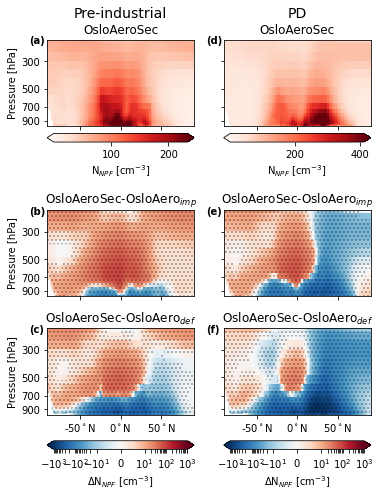

In [12]:

var = 'NCONC01'
fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=None,
                                   ctrl=None,
                                   cases_oth=None,
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=False,
                                   norm_diff=norm_dic[var],
                                   switch_diff=True
                                   )
for ct in ['PI', 'PD']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        t, T = load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                                  avg_over_lev=avg_over_lev,

                                  ci=.95,
                                  groupby=None,
                                  dims=('lon',),
                                  area='Global',
                                  avg_dim='time',
                                  hatches=['...', ''], hatch_lw=.3,
                                  transform=None,
                                  reverse=False)
clear_output()
# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffsN_AER_PI_diff_PD_diff


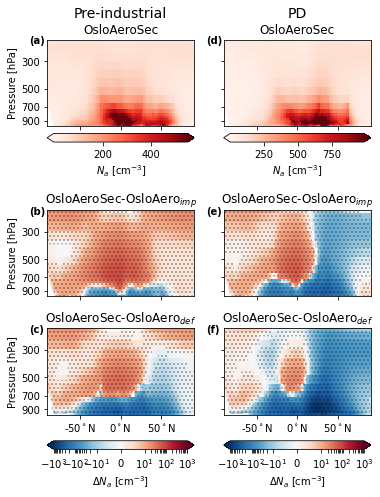

In [27]:
var = 'N_AER'
fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=None,
                                   ctrl=None,
                                   cases_oth=None,
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=False,
                                   norm_diff=norm_dic[var],
                                   switch_diff=True
                                   )
for ct in ['PI', 'PD']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffsAWNC_incld_PI_diff_PD_diff


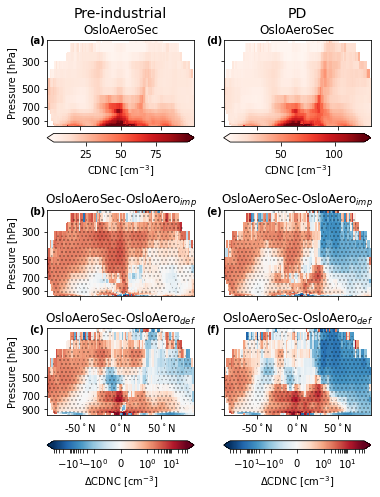

In [28]:

var = 'AWNC_incld'
fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=None,
                                   ctrl=None,
                                   cases_oth=None,
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=False,
                                   norm_diff=norm_dic[var],
                                   switch_diff=True
                                   )
for ct in ['PI', 'PD']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffsN50_PI_diff_PD_diff


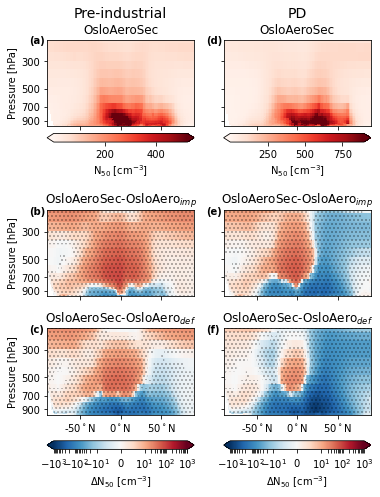

In [29]:
var = 'N50'
fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=None,
                                   ctrl=None,
                                   cases_oth=None,
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=False,
                                   norm_diff=norm_dic['NCONC01'],
                                   switch_diff=True
                                   )
for ct in ['PI', 'PD']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffsN100_PI_diff_PD_diff


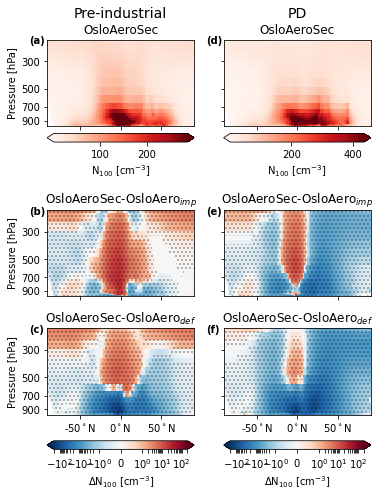

In [30]:

var = 'N100'
fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=None,
                                   ctrl=None,
                                   cases_oth=None,
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=False,
                                   norm_diff=norm_dic['N'],
                                   switch_diff=True,
                                   )
for ct in ['PI', 'PD']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffsN150_PI_diff_PD_diff


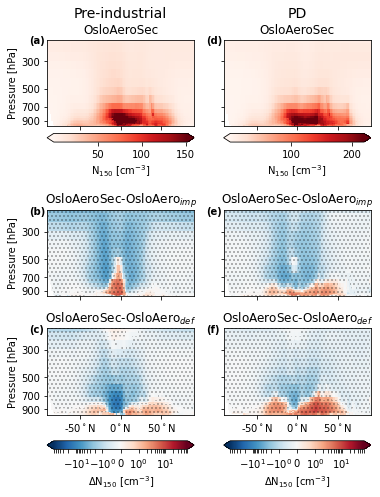

In [31]:
var = 'N150'
fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=None,
                                   ctrl=None,
                                   cases_oth=None,
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=False,
                                   norm_diff=colors.SymLogNorm(vmin=-7e1, vmax=7e1, linthresh=1),
                                   switch_diff=True
                                   )
for ct in ['PI', 'PD']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffsN200_PI_diff_PD_diff


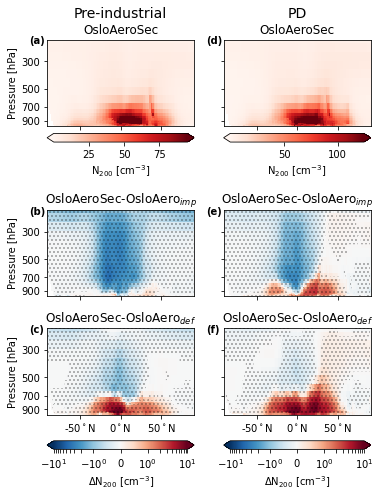

In [32]:

var = 'N200'
fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=None,
                                   ctrl=None,
                                   cases_oth=None,
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=False,
                                   norm_diff=colors.SymLogNorm(vmin=-1e1, vmax=1e1, linthresh=1),
                                   switch_diff=True
                                   # norm_diff=colors.Normalize(vmin=-5, vmax=5)#, linthresh=1)

                                   )
for ct in ['PI', 'PD']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffsN250_PI_diff_PD_diff


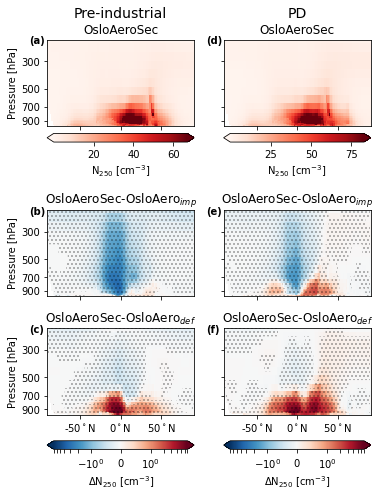

In [33]:
var = 'N250'
fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=None,
                                   ctrl=None,
                                   cases_oth=None,
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=False,
                                   norm_diff=colors.SymLogNorm(vmin=-7, vmax=7, linthresh=1),
                                   switch_diff=True
                                   # norm_dic['N']
                                   )
for ct in ['PI', 'PD']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffsFREQL_PI_diff_PD_diff


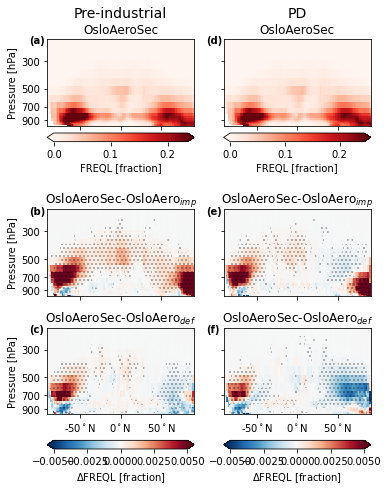

In [34]:

var = 'FREQL'
fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=None,
                                   ctrl=None,
                                   cases_oth=None,
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=False,
                                   norm_diff=colors.Normalize(vmin=-.005, vmax=.005),
                                   switch_diff=True
                                   )
for ct in ['PI', 'PD']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffsCLDLIQ_PI_diff_PD_diff


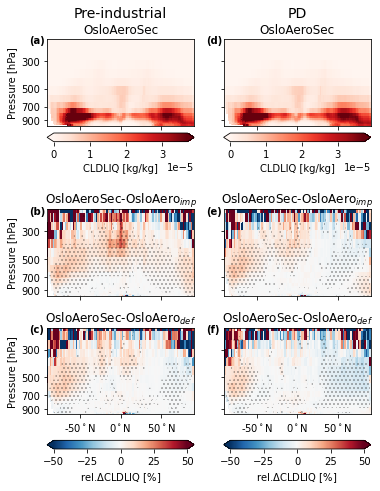

In [35]:
var = 'CLDLIQ'
fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=None,
                                   ctrl=None,
                                   cases_oth=None,
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=True,
                                   norm_diff=colors.Normalize(vmin=-50, vmax=50),
                                   switch_diff=True
                                   )
for ct in ['PI', 'PD']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()

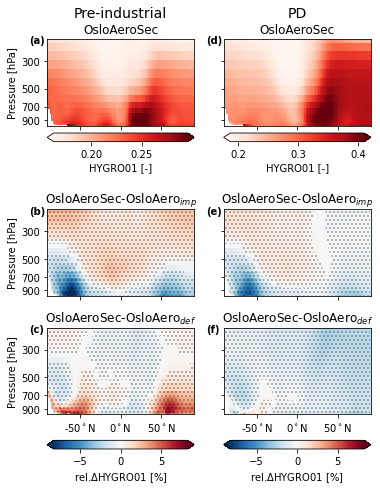

In [36]:
var = 'HYGRO01'
fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=None,
                                   ctrl=None,
                                   cases_oth=None,
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=True,

                                   switch_diff=True
                                   # norm_diff=norm_dic[var]
                                   )
for ct in ['PI', 'PD']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

plt.show()

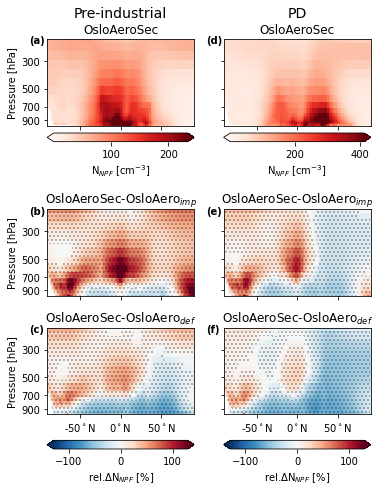

In [37]:

var = 'NCONC01'
fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=None,
                                   ctrl=None,
                                   cases_oth=None,
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=True,
                                   switch_diff=True
                                   # norm_diff=norm_dic[var]
                                   )
for ct in ['PI', 'PD']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

plt.show()

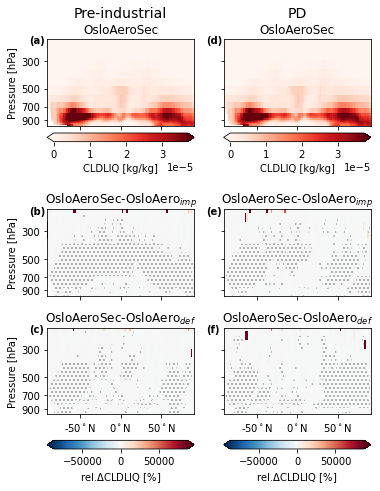

In [38]:

var = 'CLDLIQ'
fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=None,
                                   ctrl=None,
                                   cases_oth=None,
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=True,
                                   switch_diff=True
                                   # norm_diff=norm_dic[var]
                                   )
for ct in ['PI', 'PD']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

plt.show()